In [ ]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
import seaborn as s
from sklearn.metrics import accuracy_score

## Importing the Dataset -

In [ ]:
#loading the dataset
data=pd.read_csv("/content/heart.csv")


data.head()   #print first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()    #print last five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## EDA

In [ ]:
#statistical measure of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Age :
>The average age in the dataset is 54.3 years

>The oldest is 77 years, whereas the youngest is 29 years old

Cholesterol:
>The average registered cholestrol level is 246.26

>Maximum level is 564 and the minimum level is 126.

Resting blood pressure:
> mean -> 131,max ->200 and min ->94

Max heart rate achieved:
>The average heart rate found is 149.5 bpm.

>The Maximum and Minumum are 202bpm and 71bpm respectively.

St_depression:
>The average value of st_dpression is 1.03.

>Max is 6.2 and the minimum is 0.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print(np.shape(data))

(303, 14)


> The above analysis tells us that the dataset has 14 columns ans 303 columns and the data types are "int64" and "float64"

In [ ]:
print(data.columns) #prints name of the columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
print(data.isnull().any())  # checking for any null value in the data set

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


> result shows there are no null values

In [ ]:
#checking on the target variable
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

            1-> defective heart        2-> healthy heart
>above measure shows that 165 people have heart disease and 138 people don't have heart disease

In [ ]:
#analysis over age
print("avrage age is :",np.average(data.age))
print("maximum age is :",np.max(data.age))
print("minimum age is :",np.min(data.age))

avrage age is : 54.366336633663366
maximum age is : 77
minimum age is : 29


In [ ]:
#analysis over cholesterol level
print("avrage cholesterol level is :",np.average(data.chol))
print("maximum cholesterol level is :",np.max(data.chol))
print("minimum cholesterol level is :",np.min(data.chol))

avrage cholesterol level is : 246.26402640264027
maximum cholesterol level is : 564
minimum cholesterol level is : 126


In [ ]:
#splitting the data
y=data.target.values
x_data=data.drop(["target"],axis=1)

In [ ]:
#normalization of the data
norm=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
norm

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


## Splitting data into train_set and test_set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(norm,y,test_size=0.2,random_state=0)

In [ ]:
#checking the splitted value

print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(61, 13) (242, 13) (61,) (242,)


### performing some model and training the data set

### Logistic Regression

In [ ]:
#choosing a model currently logistic regression

log=LR()
log.fit(x_train,y_train)   #training a model   x_train.T to transpose

print("Test accuracy of training data using Logistic regression: {}".format(log.score(x_train,y_train)*100))
print("Test accuracy of test data usning Logistic regression: {}".format(log.score(x_test,y_test)*100))

Test accuracy of training data using Logistic regression: 83.47107438016529
Test accuracy of test data usning Logistic regression: 83.60655737704919


### K nearest neighbour

In [ ]:
#k nearest neighbour

knn=KNC(n_neighbors=7)
knn.fit(x_train,y_train)

print("Test accuracy of training data using KNN: {}".format(knn.score(x_train,y_train)*100))
print("Test accuracy of test data using KNN regression: {}".format(knn.score(x_test,y_test)*100))

Test accuracy of training data using KNN: 84.71074380165288
Test accuracy of test data using KNN regression: 90.1639344262295


the best accuracy is 90.1639344262295 at 7


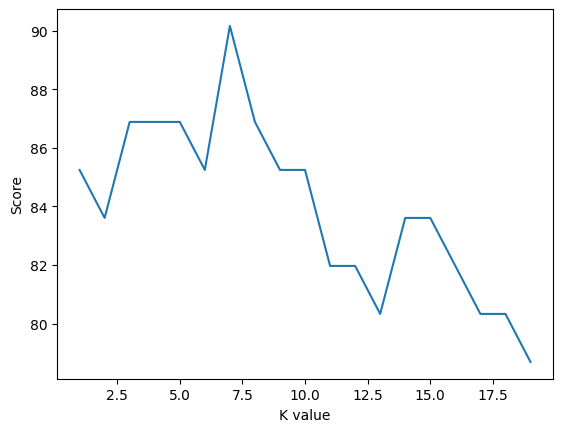

In [ ]:
# to get the best accuracy
score=[]
for i in range(1,20):
    knn=KNC(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    score.append(knn.score(x_test,y_test)*100)
print("the best accuracy is",max(score),"at",score.index(max(score))+1)


plt.plot(range(1,20),score
        )
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

>By doing above step we will come to know for a point at which the value is most accurate
>>and that value is 7 at which we are getting accuracy = 90.1639344262295

### Support Vector machine

In [ ]:
# support vector machine algorithm

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("Test accuracy of training data using SVM: {}".format(svm.score(x_train,y_train)*100))
print("Test accuracy of test data using SVM regression: {}".format(svm.score(x_test,y_test)*100))

Test accuracy of training data using SVM: 88.01652892561982
Test accuracy of test data using SVM regression: 83.60655737704919


### Naive Bayes Algorithm

In [ ]:
#naive bayes algo

nb=GNB()
nb.fit(x_train,y_train)
print("Test accuracy of training data using NB: {}".format(nb.score(x_train,y_train)*100))
print("Test accuracy of test data using NB regression: {}".format(nb.score(x_test,y_test)*100))

Test accuracy of training data using NB: 83.47107438016529
Test accuracy of test data using NB regression: 85.24590163934425


### Decision Tree Algorithm

In [ ]:
# decision tree algo

dtc=DTC()
dtc.fit(x_train,y_train)
print("Test accuracy of training data using DTC regression: {}".format(dtc.score(x_train,y_train)*100))
print("Test accuracy of test data using DTC regression: {}".format(dtc.score(x_test,y_test)*100))

Test accuracy of training data using DTC regression: 100.0
Test accuracy of test data using DTC regression: 73.77049180327869


### Random Forest algorithm

In [ ]:
# random forest algorithm

rf=RFC(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
print("Test accuracy of training data using RFC regression: {}".format(rf.score(x_train,y_train)*100))
print("Test accuracy of test data using RFC regression: {}".format(rf.score(x_test,y_test)*100))

Test accuracy of training data using RFC regression: 100.0
Test accuracy of test data using RFC regression: 85.24590163934425


In [ ]:
methods=["LR","KNN","SVM","NB","DTC","RFC"]
accuracy=[log.score(x_test,y_test)*100,knn.score(x_test,y_test)*100,svm.score(x_test,y_test)*100,nb.score(x_test,y_test)*100,dtc.score(x_test,y_test)*100,rf.score(x_test,y_test)*100]
colors=["purple","green","blue","orange","magenta","#CFC60E","#0FBBAE"]

<Axes: xlabel='methods', ylabel='accuracy'>

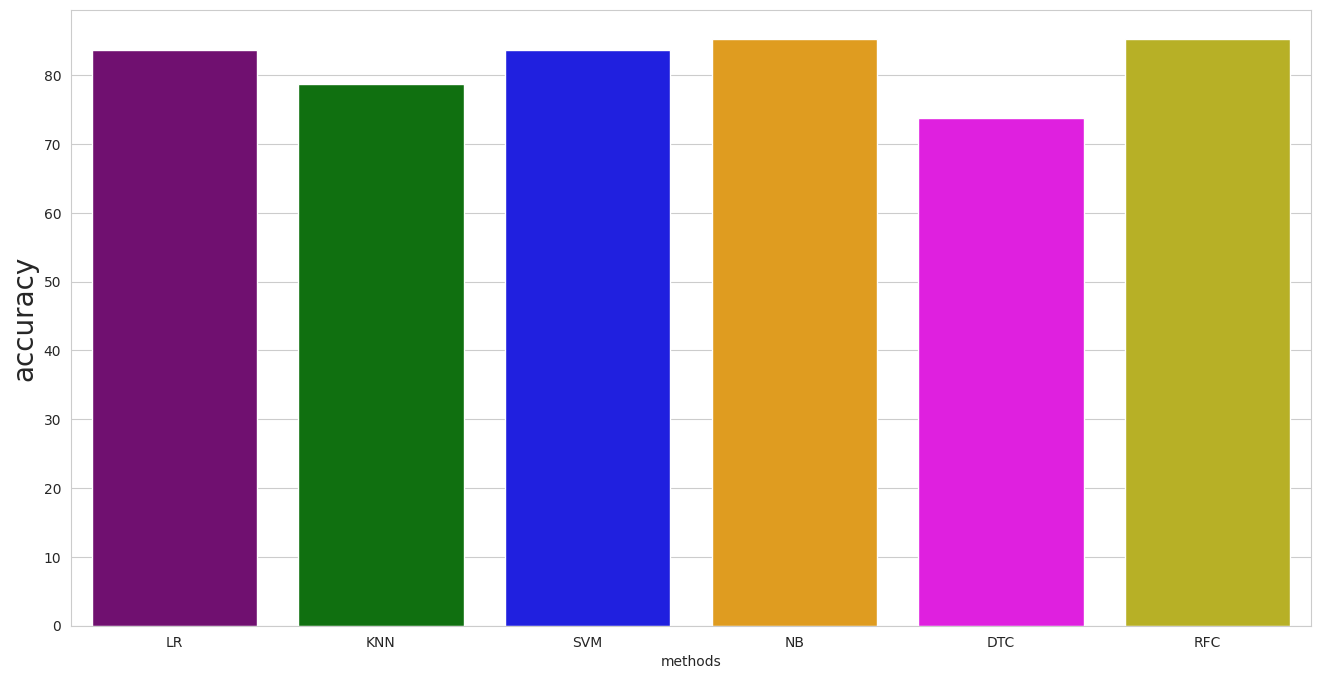

In [ ]:
s.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("accuracy",size=20)
plt.xlabel("methods")
s.barplot(x=methods,y=accuracy,palette=colors)

> From above annalysis we came to know that the best model that fit over this dataset is K nearest algorithm as it gives highest accuracy

### Applying KNN to predict the output

In [ ]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#changing to the numpy array
array=np.asarray(input_data)
#reshaping the input
input_data_reshape=array.reshape(1,-1)

prediction=knn.predict(input_data_reshape)

if prediction[0]==0:
    print("The person does not have Heart Disease")
else:
    print("The person has heart Disease")

The person has heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Provided description of the dataset

1.age: age in years

2.sex: sex
>1 = male

>0 = female

3.cp: chest pain type
>Value 0: typical angina

>Value 1: atypical angina

>Value 2: non-anginal pain

>Value 3: asymptomatic

4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5.chol: serum cholestoral in mg/dl

6.fbs: (fasting blood sugar > 120 mg/dl)
>1 = true;

>0 = false

7.restecg: resting electrocardiographic results
>Value 0: normal

>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.thalach: maximum heart rate achieved

9.exang: exercise induced angina
>1 = yes

>0 = no

10.oldpeak = ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment
>Value 0: upsloping

>Value 1: flat

>Value 2: downsloping

12.ca: number of major vessels (0-3) colored by flourosopy

13.thal:
>0 = error (in the original dataset 0 maps to NaN's)

>1 = fixed defect

>2 = normal

>3 = reversable defect

14.target (the lable):
>0 = no disease,

>1 = disease